In [76]:
import nltk
from nltk import Text,FreqDist,word_tokenize, pos_tag, ne_chunk,bigrams, trigrams
from nltk.corpus import reuters,webtext
from nltk.collocations import *

import matplotlib.pyplot as plt
%matplotlib inline 

### nltk introduction

In [14]:
# we will start by looking at the morphology of a sentence or how does a sentence divide into list of words (bag of words)
# then we look ath the syntaxt of those words along with their semantic


text = "Moh is a Datascientist"

# Morphology 
tokens = word_tokenize(text)
print("The Morpholohy of the sentence \"{}\" is : {}".format(text,tokens))

# Syntax
tagged_tokens = pos_tag(tokens)
print("\nThe syntax of the sentence \"{}\" is : {}".format(text,tagged_tokens))

# Semantic
ner_tree = ne_chunk(tagged_tokens)
print("\nThe tree of the sentence \"{}\" is : {}".format(text,ner_tree))

The Morpholohy of the sentence "Moh is a Datascientist" is : ['Moh', 'is', 'a', 'Datascientist']

The syntax of the sentence "Moh is a Datascientist" is : [('Moh', 'NNP'), ('is', 'VBZ'), ('a', 'DT'), ('Datascientist', 'NN')]

The tree of the sentence "Moh is a Datascientist" is : (S (GPE Moh/NNP) is/VBZ a/DT Datascientist/NN)


### Exploring nltk.text

In [12]:


text = Text(reuters.words())

# Get the collocations that don't contain stop-words
print('The collactions of the text are:')
text.collocations()

# Get words that appear in similar contexts
word = 'Monday'
print('\nWords that appear in similar contexts as {} are:'.format(word))
text.similar(word,5)

# Get common contexts for a list of words
list_words = ['August','June']
print('\nCommon contexts of the list of words {} are:'.format(list_words))
text.common_contexts(list_words)

# Get contexts for a word
print('\nThe contexts for the word {} are:'.format(word))
text.concordance(word)

The collactions of the text are:
mln dlrs; cts Net; Avg shrs; NET Shr; 4TH QTR; last year; United
States; per share; billion dlrs; 000 Revs; QTR NET; New York; 3RD QTR;
Qtly div; 1ST QTR; 000 dlrs; Oper shr; 000 tonnes; Nine mths; mln stg

Words that appear in similar contexts as Monday are:
april march friday february january

Common contexts of the list of words ['August', 'June'] are:
on_and since_and from_on in_because and_and in_they since_a last_to
on_the by_it in_july ended_shr in_the and_traders ended_and last_when
in_last in_u to_shipment last_the

The contexts for the word Monday are:
Displaying 25 of 240 matches:
said . Trade Minister Saleh said on Monday that Indonesia , as the world ' s s
Reuters to clarify his statement on Monday in which he said the pact should be
 the 11 - member CPA which began on Monday . They said producers agreed that c
ief Burkhard Junger was arrested on Monday on suspicion of embezzlement and of
ween one and 1 . 25 billion dlrs on Monday and Tuesd

### Basic text stats with NLTK

In [37]:
# Build a large text
text = ""
for wt in webtext.fileids()[:100]:
    text += "\n\n" + webtext.raw(wt)

# Get the text's vocabulary    
fdist = FreqDist(word_tokenize(text))


print('The first 100 words are:\n {}'.format(list(fdist.keys())[:100])) # First 100 words

key = 'woody'
print('\nThe frequency of the word {} is: {}'.format(key,fdist[key]))

The first 100 words are:
 ['224748', 'somewhere', 'Ballet', 'Appendix', 'photography', 'Logs-out', 'soles', 'libstdc++', 'baysian', 'www.xy.com', 'Pirate', 'extinguish', 'ip', 'judgmental', '215981', 'half-loaded', 'contests', 'UAs', 'shift+link', 'generous', 'tattoos', 'Hints', 'fur', 'rich', 'Burberry', 'Piglet', 'warmer', 'signons.txt', 'inter', 'forty-nine', 'cinematography', 'soul', 'Long', 'intercoms', 'unh-unh', 'Typo', 'Leave', 'Entry', 'disappear', 'metallic', 'cleaned', 'queryCharset', '0.5.2', 'anti-Semitic', 'out-yuppied', 'baseline', '-feature', 'PARTY', 'holdup', 'charcteristic', 'LUCKY', 'commando', 'browser.urlbar.clickSelectsAll', 'spending', 'collective', 'locked', 'intercom', 'story', 'Ave', 'Flyer', 'buggering', 'challenge', 'protrude', 'URL-bar', 'Klonopin', 'GMail', 'Download-Font', 'Purple', 'cust', 'Holding', 'non-adjacent', 'brother', 'integrity', 'coarseness', 'Kidding', 'suspenseful', 'interpret', 'XP', 'systemwide', 'Lancelot', 'mentholy', 'forlder', 'modern


The total nuber of samples is: 379935

The proportion of the word Monday is: 2.6320291628831248e-05

Words that appear exacly once: ['224748', 'Appendix', 'photography', 'Logs-out', 'libstdc++', 'baysian', 'www.xy.com', 'Pirate', 'extinguish', 'ip']

Most common words are: [('.', 16500), (':', 14327), (',', 12427), ('I', 7786), ('the', 7313)]



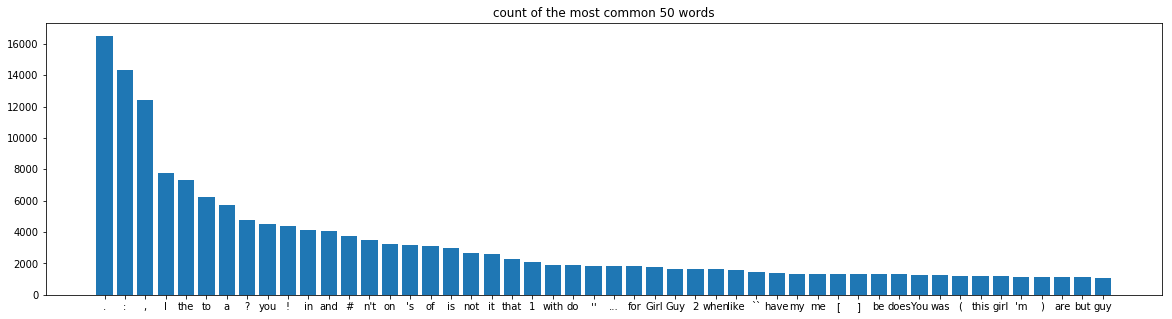

In [67]:
# Total number of samples
print ('\nThe total nuber of samples is: {}'.format(fdist.N())) # 379935


# word proportion: word frequency/total number of samples 
print ('\nThe proportion of the word {} is: {}'.format(word,fdist.freq(word))) # 1.84242041402e-05
 
 
# Words that appear exactly once
print ('\nWords that appear exacly once: {}'.format(fdist.hapaxes()[:10]))
 

print('\nMost common words are: {}\n'.format(fdist.most_common(n=5))) # [(u'.', 16500), (u':', 14327), (u',', 12427), (u'I', 7786), (u'the', 7313)]

# Draw a bar chart with the 
fig = plt.subplots(figsize=(20,5))
x, y = zip(*fdist.most_common(n=50))
plt.bar(range(len(x)), y)
plt.xticks(range(len(x)), x)
plt.title('count of the most common 50 words')
plt.show()

### Bigrams, Trigrams, Collocations

In [74]:
text = "Moh is a Datascientist"
tokens = word_tokenize(text)
 
print ('The bigrams of the sentence {} are: {}'.format(text, list(bigrams(tokens))))
 
print ('The trigrams of the sentence {} are: {}'.format(text, list(trigrams(tokens))))

The bigrams of the sentence Moh is a Datascientist are: [('Moh', 'is'), ('is', 'a'), ('a', 'Datascientist')]
The trigrams of the sentence Moh is a Datascientist are: [('Moh', 'is', 'a'), ('is', 'a', 'Datascientist')]


In [75]:

bigram_measures = nltk.collocations.BigramAssocMeasures()
trigram_measures = nltk.collocations.TrigramAssocMeasures()
 
## Bigrams
finder = BigramCollocationFinder.from_words(nltk.corpus.reuters.words())
 
# only bigrams that appear 5+ times
finder.apply_freq_filter(5)
 
# return the 50 bigrams with the highest PMI
print (finder.nbest(bigram_measures.pmi, 50))

 
## Trigrams
finder = TrigramCollocationFinder.from_words(nltk.corpus.reuters.words())
# only trigrams that appear 5+ times
finder.apply_freq_filter(5)
 
# return the 50 trigrams with the highest PMI
print (finder.nbest(trigram_measures.pmi, 50))
 

[('DU', 'PONT'), ('Keng', 'Yaik'), ('Kwik', 'Save'), ('Nihon', 'Keizai'), ('corenes', 'pora'), ('fluidized', 'bed'), ('Akbar', 'Hashemi'), ('Constructions', 'Telephoniques'), ('Elevator', 'Mij'), ('Entre', 'Rios'), ('Graan', 'Elevator'), ('JIM', 'WALTER'), ('Taikoo', 'Shing'), ('der', 'Vorm'), ('di', 'Clemente'), ('Borrowing', 'Requirement'), ('FOOTE', 'MINERAL'), ('Hawker', 'Siddeley'), ('JARDINE', 'MATHESON'), ('PRORATION', 'FACTOR'), ('Wildlife', 'Refuge'), ('Kohlberg', 'Kravis'), ('Almir', 'Pazzionotto'), ('Bankhaus', 'Centrale'), ('Corpus', 'Christi'), ('Kuala', 'Lumpur'), ('Maple', 'Leaf'), ('Stats', 'Oljeselskap'), ('Zoete', 'Wedd'), ('Tadashi', 'Kuranari'), ('Drawing', 'Rights'), ('EASTMAN', 'KODAK'), ('Martinez', 'Cuenca'), ('Mathematical', 'Applications'), ('Neutral', 'Zone'), ('Townsend', 'Thoresen'), ('Sector', 'Borrowing'), ('Hashemi', 'Rafsanjani'), ('Hossein', 'Mousavi'), ('Kitty', 'Hawk'), ('Task', 'Force'), ('Tender', 'Loving'), ('WELLS', 'FARGO'), ('SLAUGHTER', 'GUESS